In [2]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the dataset
df = pd.read_csv("synthetic_sales_data.csv")
print(df)

      OrderID        Date      Customer     Product     Category  Quantity  \
0    ORD00001  2022-04-01  Customer_159     Monitor  Electronics         4   
1    ORD00002  2023-11-05   Customer_82  Smartwatch    Wearables         3   
2    ORD00003  2022-11-25   Customer_15  Smartphone  Electronics         5   
3    ORD00004  2023-10-15    Customer_8     Monitor  Electronics         3   
4    ORD00005  2022-10-13    Customer_7  Smartphone  Electronics         3   
..        ...         ...           ...         ...          ...       ...   
995  ORD00996  2023-08-25   Customer_33       Mouse  Accessories         1   
996  ORD00997  2023-10-04   Customer_33    Keyboard  Accessories         1   
997  ORD00998  2022-04-06   Customer_62  Smartphone  Electronics         4   
998  ORD00999  2022-07-27  Customer_139       Mouse  Accessories         1   
999  ORD01000  2023-05-06   Customer_98    Keyboard  Accessories         2   

     UnitPrice  TotalSales Region  
0      1903.89     7615.56 

In [6]:
df.head()

,OrderID,Date,Customer,Product,Category,Quantity,UnitPrice,TotalSales,Region
0,ORD00001,2022-04-01,Customer_159,Monitor,Electronics,4,1903.89,7615.56,West
1,ORD00002,2023-11-05,Customer_82,Smartwatch,Wearables,3,1570.40,4711.20,South
2,ORD00003,2022-11-25,Customer_15,Smartphone,Electronics,5,354.24,1771.20,East
3,ORD00004,2023-10-15,Customer_8,Monitor,Electronics,3,244.95,734.85,North
4,ORD00005,2022-10-13,Customer_7,Smartphone,Electronics,3,1739.04,5217.12,North


In [12]:
df.isnull().any().sum()
# As we can we dont have any null values ,we can proceed further 

0

In [14]:
# Step 2: Data Cleaning
# Convert Date column to datetime
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'])


0     2022-04-01
1     2023-11-05
2     2022-11-25
3     2023-10-15
4     2022-10-13
         ...    
995   2023-08-25
996   2023-10-04
997   2022-04-06
998   2022-07-27
999   2023-05-06
Name: Date, Length: 1000, dtype: datetime64[ns]


As from the observations the data is clear for EDA as we have no null values and also converted date to datetime

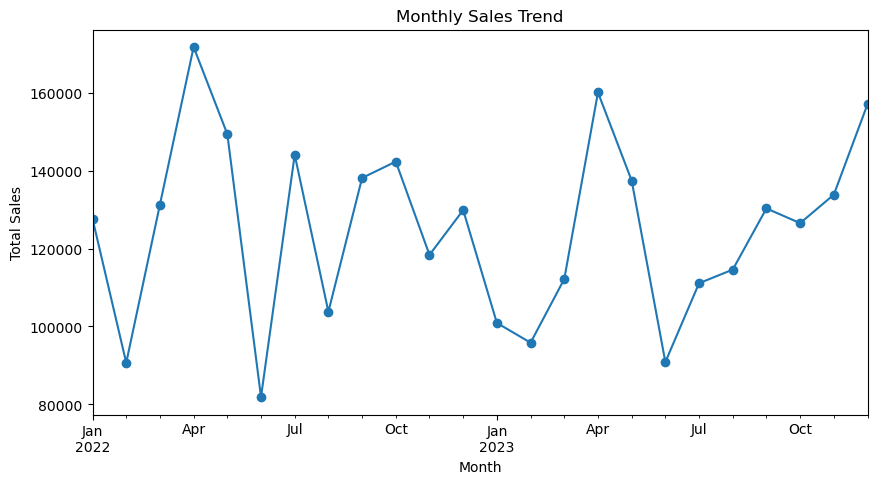

In [16]:
# Step 3: Exploratory Data Analysis (EDA)

## Sales Trend Over Time
sales_trend = df.groupby(df["Date"].dt.to_period("M"))["TotalSales"].sum()
sales_trend.plot(kind="line", figsize=(10,5), marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

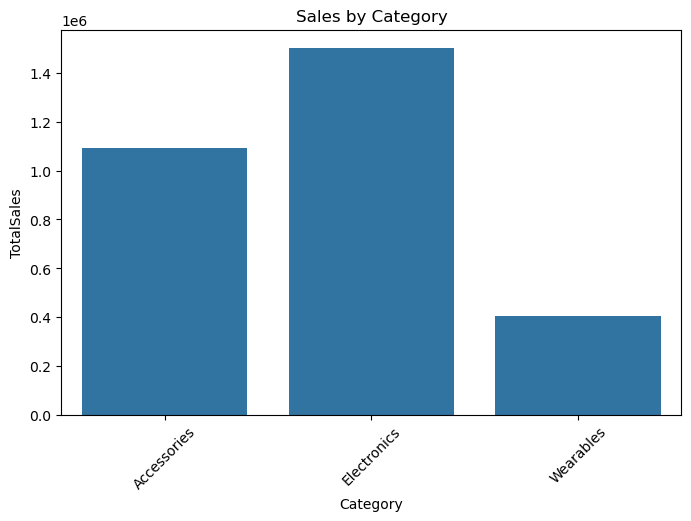

In [18]:
#  Sales by Category
plt.figure(figsize=(8,5))
sns.barplot(data=df.groupby("Category")["TotalSales"].sum().reset_index(),
            x="Category", y="TotalSales")
plt.title("Sales by Category")
plt.xticks(rotation=45)
plt.show()

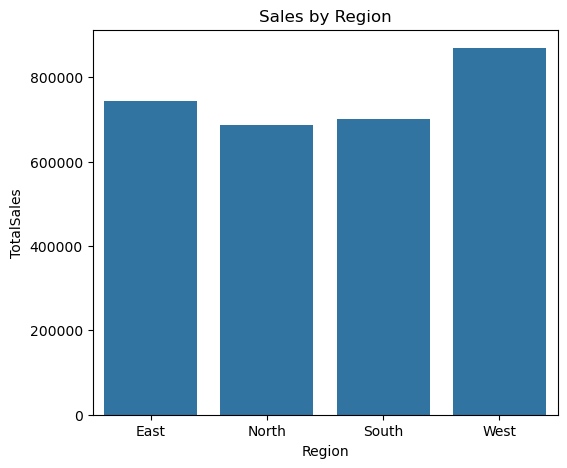

In [20]:
# Sales by Region
plt.figure(figsize=(6,5))
sns.barplot(data=df.groupby("Region")["TotalSales"].sum().reset_index(),
            x="Region", y="TotalSales")
plt.title("Sales by Region")
plt.show()

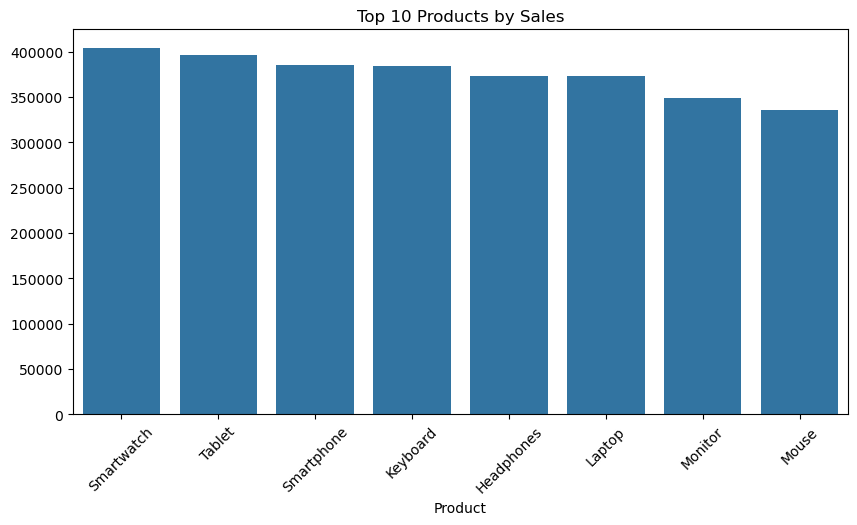

In [22]:
# Top 10 Products
plt.figure(figsize=(10,5))
top_products = df.groupby("Product")["TotalSales"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 10 Products by Sales")
plt.xticks(rotation=45)
plt.show()

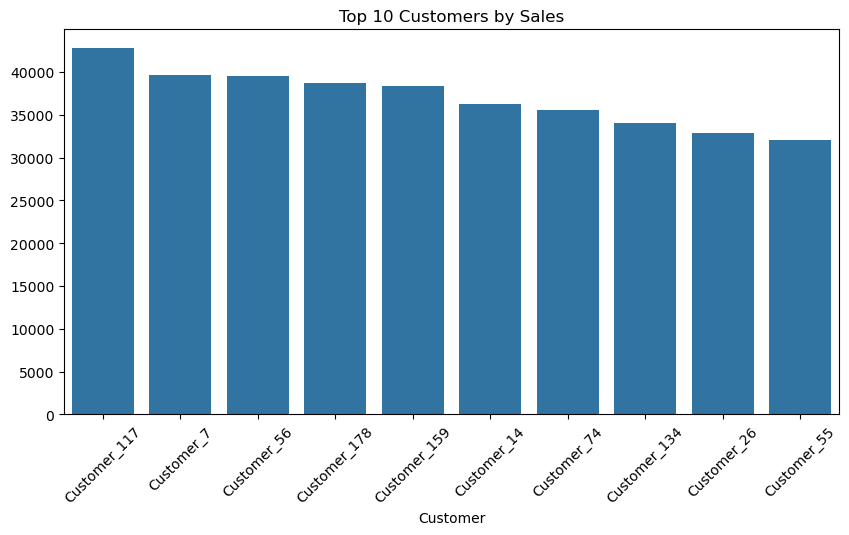

In [24]:
# Top 10 Customers
plt.figure(figsize=(10,5))
top_customers = df.groupby("Customer")["TotalSales"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title("Top 10 Customers by Sales")
plt.xticks(rotation=45)
plt.show()

In [26]:
# Step 4: Export Cleaned Data
output_path = "clean_sales_data.csv"
df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")


Cleaned dataset saved to clean_sales_data.csv
